# NYC Property Sales

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period. This data is about properties sold in New York City over a 12-month period from September 2016 to September 2017.

Content

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

Task :
Can you spot trends in the market, or build a model that predicts sale value in the future

# 1.Loading libraries and Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from prettytable import PrettyTable
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

#import the necessary modelling algos.
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
# Import dataset

df = pd.read_csv(r"D:\Data Science\Projects\NYC-Sales\nyc-sales.csv")
df.shape

(84548, 22)

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# 2.Data Inspection & Visualization

In [4]:
#Dropping column as it is empty
del df['Unnamed: 0']
#Dropping few columns
del df['BUILDING CLASS AT PRESENT']
del df['BUILDING CLASS AT TIME OF SALE']
del df['NEIGHBORHOOD']
del df['SALE DATE']
del df['EASE-MENT']
del df['ADDRESS']
del df['APARTMENT NUMBER']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  int64 
 1   BUILDING CLASS CATEGORY    84548 non-null  object
 2   TAX CLASS AT PRESENT       84548 non-null  object
 3   BLOCK                      84548 non-null  int64 
 4   LOT                        84548 non-null  int64 
 5   ZIP CODE                   84548 non-null  int64 
 6   RESIDENTIAL UNITS          84548 non-null  int64 
 7   COMMERCIAL UNITS           84548 non-null  int64 
 8   TOTAL UNITS                84548 non-null  int64 
 9   LAND SQUARE FEET           84548 non-null  object
 10  GROSS SQUARE FEET          84548 non-null  object
 11  YEAR BUILT                 84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 13  SALE PRICE                 84548 non-null  object
dtypes: int

In [6]:
#Let's convert some of the columns to appropriate datatype

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BOROUGH                    84548 non-null  category
 1   BUILDING CLASS CATEGORY    84548 non-null  object  
 2   TAX CLASS AT PRESENT       84548 non-null  category
 3   BLOCK                      84548 non-null  int64   
 4   LOT                        84548 non-null  int64   
 5   ZIP CODE                   84548 non-null  int64   
 6   RESIDENTIAL UNITS          84548 non-null  int64   
 7   COMMERCIAL UNITS           84548 non-null  int64   
 8   TOTAL UNITS                84548 non-null  int64   
 9   LAND SQUARE FEET           58296 non-null  float64 
 10  GROSS SQUARE FEET          56936 non-null  float64 
 11  YEAR BUILT                 84548 non-null  int64   
 12  TAX CLASS AT TIME OF SALE  84548 non-null  category
 13  SALE PRICE                 6998

In [8]:
#Overview of data
#Show no. of None values

print(df.columns[df.isnull().any()])
print(df.isnull().sum())

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')
BOROUGH                          0
BUILDING CLASS CATEGORY          0
TAX CLASS AT PRESENT             0
BLOCK                            0
LOT                              0
ZIP CODE                         0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             26252
GROSS SQUARE FEET            27612
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
dtype: int64


In [9]:
#Drop missing values

df.dropna(axis=0,inplace=True)
print(df.isnull().sum())

BOROUGH                      0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
ZIP CODE                     0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
dtype: int64


In [10]:
#Checking for duplicated entries

sum(df.duplicated(df.columns))

1044

In [11]:
#Delete the duplicates and check that it worked

df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

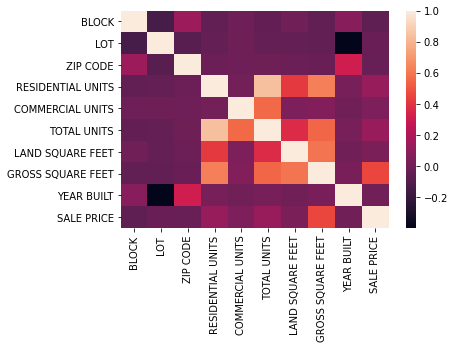

In [12]:
#correlation between the features
# Last row represents the correlation of different features with SALE PRICE

corr = df.corr()
sns.heatmap(corr)

In [13]:
#numeric correlation

corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.464202
TOTAL UNITS          0.133246
RESIDENTIAL UNITS    0.130590
COMMERCIAL UNITS     0.045688
LAND SQUARE FEET     0.042791
YEAR BUILT           0.007595
LOT                 -0.014661
ZIP CODE            -0.020265
BLOCK               -0.051996
Name: SALE PRICE, dtype: float64

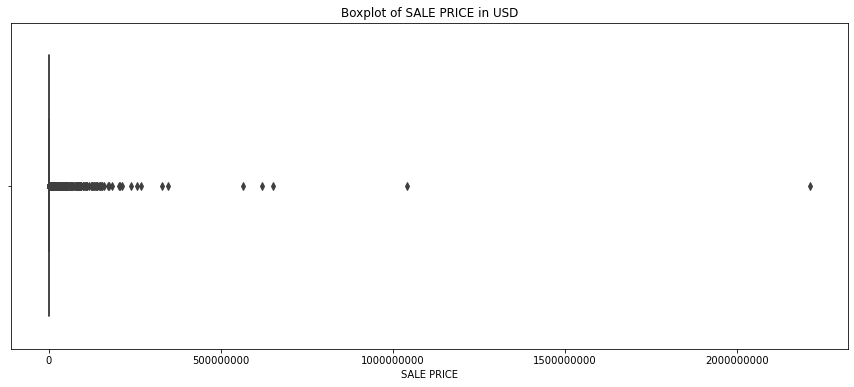

In [14]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df[['SALE PRICE']])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

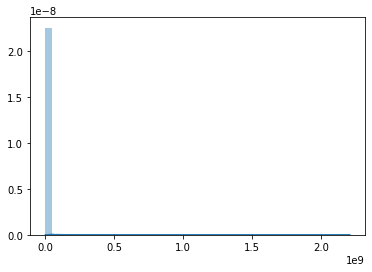

In [15]:
sns.distplot(df[['SALE PRICE']])

In [16]:
# Remove observations that fall outside those caps

df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

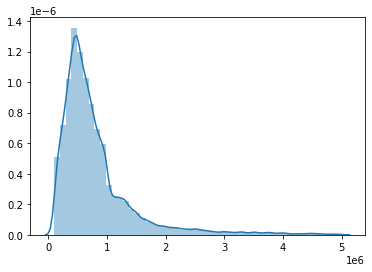

In [17]:
# Plot 

sns.distplot(df[['SALE PRICE']])

In [18]:
#skewness of SalePrice

df['SALE PRICE'].skew()

2.651961209495297

0.15037760544365672


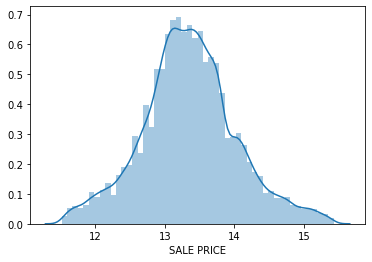

In [19]:
#SALE PRICE is highly right skewed. So, we will log transform it so that it give better results.
#Well now we can see the symmetry and thus it is normalised.

sales = np.log(df['SALE PRICE'] )

print(sales.skew())
sns.distplot(sales)

# 3. Data Pre Processing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34549 entries, 3 to 84545
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BOROUGH                    34549 non-null  category
 1   BUILDING CLASS CATEGORY    34549 non-null  object  
 2   TAX CLASS AT PRESENT       34549 non-null  category
 3   BLOCK                      34549 non-null  int64   
 4   LOT                        34549 non-null  int64   
 5   ZIP CODE                   34549 non-null  int64   
 6   RESIDENTIAL UNITS          34549 non-null  int64   
 7   COMMERCIAL UNITS           34549 non-null  int64   
 8   TOTAL UNITS                34549 non-null  int64   
 9   LAND SQUARE FEET           34549 non-null  float64 
 10  GROSS SQUARE FEET          34549 non-null  float64 
 11  YEAR BUILT                 34549 non-null  int64   
 12  TAX CLASS AT TIME OF SALE  34549 non-null  category
 13  SALE PRICE                 3454

# Normalising and Transforming Numerical columns

### Normalising and Transforming Numerical columns

In [21]:
Index = ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE']

for col in Index:
    scaler = StandardScaler()
    scaler.fit(df[col].values.reshape(-1,1))
    df[col] = scaler.transform(df[col].values.reshape(-1,1))


In [22]:
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
3,1,07 RENTALS - WALKUP APARTMENTS,2B,-1.334637,-0.429384,-0.980097,0.726526,-0.012859,0.483888,-0.020054,0.212617,0.138681,2,4.800169
6,1,07 RENTALS - WALKUP APARTMENTS,2B,-1.333537,-0.406335,-0.980097,0.550860,-0.012859,0.364593,-0.038507,0.096786,0.155713,2,3.663110
172,1,14 RENTALS - 4-10 UNIT,2A,-1.337663,-0.433575,-0.980097,0.111695,0.069016,0.126004,-0.046637,0.057725,0.131382,2,3.827009
174,1,14 RENTALS - 4-10 UNIT,2A,-1.336838,-0.462911,-0.980097,0.287361,0.069016,0.245298,-0.037482,0.073647,0.131382,2,6.044744
195,1,22 STORE BUILDINGS,4,-1.337938,-0.402144,-0.980097,-0.151804,0.069016,-0.052938,-0.057313,0.067919,0.104617,4,4.438798


### One hot encoding categorical columns

In [23]:
#Select the variables to be one-hot encoded

one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']

In [24]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).

one_hot_encoded = pd.get_dummies(df[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34549 entries, 3 to 84545
Data columns (total 60 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   BOROUGH_1                                                             34549 non-null  uint8
 1   BOROUGH_2                                                             34549 non-null  uint8
 2   BOROUGH_3                                                             34549 non-null  uint8
 3   BOROUGH_4                                                             34549 non-null  uint8
 4   BOROUGH_5                                                             34549 non-null  uint8
 5   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                       34549 non-null  uint8
 6   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                       34549 non-null  uint8
 7   BUILDING CLAS

In [25]:
# Replacing categorical columns with dummies

df = df.drop(one_hot_features,axis=1)
df = pd.concat([df, one_hot_encoded] ,axis=1)

In [26]:
df.shape

(34549, 70)

### Train/Test Split

In [27]:
Y_df = df['SALE PRICE'] 
X_df = df.drop('SALE PRICE', axis=1)

X_df.shape , Y_df.shape

((34549, 69), (34549,))

In [28]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_df , Y_df , test_size = 0.3 , random_state =34)

print(X_train.shape)
print(Y_train.shape)

(24184, 69)
(24184,)


# 4. Modelling

In [29]:
# Root mean squared error RMSE

def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

### 4.1 Linear Regression

In [31]:
linreg = LinearRegression()

linreg.fit(X_train, Y_train)

Y_pred_lin = linreg.predict(X_test)

rmse(Y_test,Y_pred_lin)

331858412.2559898

### 4.2. Lasso Regression

In [32]:

alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 , 10, 20 ])

model = Lasso()

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train, Y_train)

print(grid.best_estimator_.alpha)
print(grid.best_score_)

0.001
0.3566915695050561


In [33]:
alpha = grid.best_estimator_.alpha

lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
rmse(Y_test,Y_pred_lasso)

0.8050339639473892

### 4.3. Ridge Regression

In [34]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]

model = Ridge()

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train, Y_train)

print(grid.best_estimator_.alpha)
print(grid.best_score_)

1
0.02009555056343959


In [35]:
best_alpha = grid.best_estimator_.alpha

ridge = Ridge(best_alpha, normalize=True)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
rmse(Y_test,Y_pred_ridge)

0.8671966518954299

### 4.4. RandomForest Regressor

In [67]:
# Number of trees in random forest
n_estimators = [50,100,200,300,500,700,1000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,20,30,40,50]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [50, 100, 200, 300, 500, 700, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, Y_train)

print(rf_random.best_params_)

NameError: name 'n_estimators' is not defined

In [38]:
rf_regr = RandomForestRegressor(n_estimators = 1000, min_samples_split = 5, min_samples_leaf = 2, 
                                max_features = 'auto', max_depth = 20, n_jobs = -1)

rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rmse(Y_test,Y_pred_rf)

0.5678473366297823

### 4.5 XGBRegressor

In [77]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], # called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = RandomizedSearchCV(estimator = xgb1,
                            param_distributions = parameters,
                            cv = 3,
                            n_jobs = -1,
                            random_state=42,
                            verbose=True)

xgb_grid.fit(X_train,Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  7.9min finished


[21:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.6601634177090184
{'subsample': 0.7, 'silent': 1, 'objective': 'reg:linear', 'nthread': 4, 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 0.7}


In [39]:
xgb2 = XGBRegressor(subsample = 0.7, 
                    objective = 'reg:squarederror', 
                    nthread = 4, 
                    n_estimators = 500, 
                    min_child_weight = 4, 
                    max_depth = 7, 
                    learning_rate = 0.03, 
                    colsample_bytree = 0.7)

xgb2.fit(X_train, Y_train)

Y_pred_xgb = xgb2.predict(X_test)

rmse(Y_test,Y_pred_xgb)

0.5671945902944977

In [40]:
### Summary

tab = PrettyTable()
tab.field_names = ["Model", "RMSE"]

tab.add_row(["LinearRegression", 331858412.2559898])
tab.add_row(["LassoRegression", 0.8050])
tab.add_row(["RidgeRegression", 0.8671])
tab.add_row(["RandomForestRegressor", 0.5671])
tab.add_row(["XGBRegressor", 0.5671])

print(tab)


+-----------------------+-------------------+
|         Model         |        RMSE       |
+-----------------------+-------------------+
|    LinearRegression   | 331858412.2559898 |
|    LassoRegression    |       0.805       |
|    RidgeRegression    |       0.8671      |
| RandomForestRegressor |       0.5671      |
|      XGBRegressor     |       0.5671      |
+-----------------------+-------------------+


# 5. Conclusion 
    
RandomForest Regressor works best for this dataset